In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

## Confusion Matrix

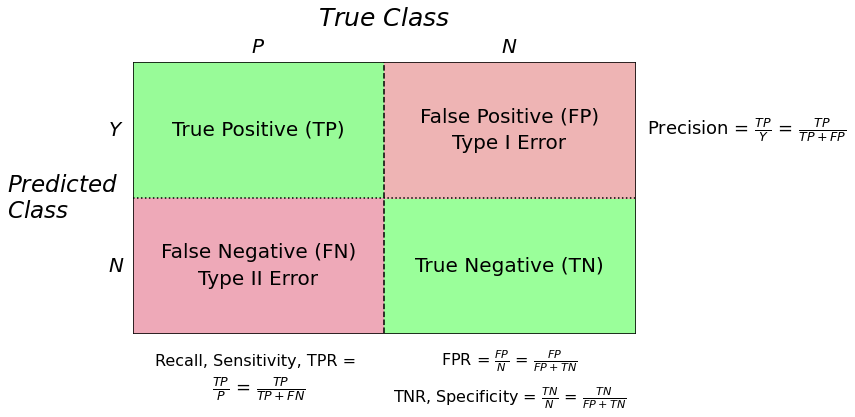

In [ ]:
plt.figure(figsize=(9,5))
plt.text(0.5,2.25,'True Positive (TP)',size=20,horizontalalignment="center",verticalalignment="center")
plt.text(1.5,2.4,'False Positive (FP)',size=20,horizontalalignment="center",verticalalignment="center")
plt.text(0.5,0.9,'False Negative (FN)',size=20,horizontalalignment="center",verticalalignment="center")
plt.text(1.5,0.75,'True Negative (TN)',size=20,horizontalalignment="center",verticalalignment="center")
plt.text(1,3.4,'$True\ Class$',size=25,horizontalalignment="center")
plt.text(-0.5,1.5,'$Predicted$\n$Class$',size=23,verticalalignment="center")
plt.text(0.5,3.1,'$P$',size=20,horizontalalignment="center")
plt.text(1.5,3.1,'$N$',size=20,horizontalalignment="center")
plt.text(-0.1,2.25,'$Y$',size=20,va="center")
plt.text(-0.1,0.75,'$N$',size=20,va="center")
plt.text(2.45,2.25,r'Precision = $\frac{TP}{Y}$ = $\frac{TP}{TP+FP}$ ',size=18,ha="center",va="center")
plt.text(0.5,-0.3,'Recall, Sensitivity, TPR = ',size=16,ha="center",va="center")
plt.text(0.5,-0.6,'$\\frac{TP}{P}$ = $\\frac{TP}{TP+FN}$',size=18,ha="center",va="center")
plt.text(1.5,-0.3,'FPR = $\\frac{FP}{N}$ = $\\frac{FP}{FP+TN}$',size=16,ha="center",va="center")
plt.text(1.5,-0.7,'TNR, Specificity = $\\frac{TN}{N}$ = $\\frac{TN}{FP+TN}$',size=16,ha="center",va="center")
plt.text(1.5,2.1,'Type I Error',size=20,horizontalalignment="center",verticalalignment="center")
plt.text(0.5,0.6,'Type II Error',size=20,horizontalalignment="center",verticalalignment="center")
plt.xticks([])
plt.yticks([])
plt.plot([1,1],[0,3],'k--')
plt.plot([0,3],[1.5,1.5],'k:')
plt.axis([0,2,0,3])

plt.fill_between([0,1],[1.5,1.5],[3,3],color='#98FB98')
plt.fill_between([0,1],[0,0],[1.5,1.5],color='#EEA9B8')
plt.fill_between([1,2],[0,0],[1.5,1.5],color='#9AFF9A')
plt.fill_between([1,2],[1.5,1.5],[3,3],color='#EEB4B4')

------

## Data

In [2]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

In [3]:
X,y = make_classification(n_samples=2000, n_features=10, n_informative=4,
                         n_redundant=1, n_classes=2, n_clusters_per_class=1,
                         weights=[0.9,0.1], flip_y=0.1, random_state=2018)   

In [4]:
pca = PCA(n_components=2)

In [5]:
X_pca = pca.fit_transform(X)

In [6]:
X_pca = pd.DataFrame(X_pca)
X_pca.columns=["pca_a","pca_b"]
X_pca["y"] = y

In [7]:
X_pca[:3]

,pca_a,pca_b,y
0,0.864326,0.244849,0
1,0.785760,0.282311,0
2,2.396793,1.376426,1


/Users/guozhe/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/guozhe/opt/anaconda3/lib/python3.8/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(11.835, 0.5, 'axis_2')

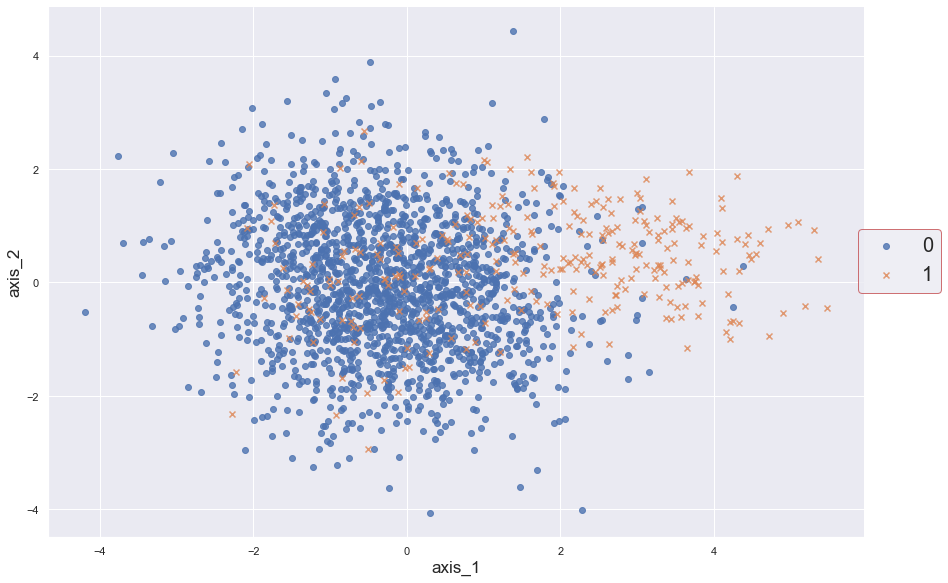

In [8]:
sns.set()
sns.lmplot("pca_a","pca_b",data=X_pca, hue="y", fit_reg=False, markers=["o","x"],size=8,aspect=1.5,legend=False)
plt.legend(fontsize=20,bbox_to_anchor=(0.98, 0.6),edgecolor ='r')   
plt.xlabel("axis_1",fontsize=17)
plt.ylabel("axis_2",fontsize=17)

## ROC

In [9]:
kf = StratifiedKFold(n_splits=2, random_state=42)
for train_index, test_index in kf.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index] 

ValueError: Setting a random_state has no effect since shuffle is False. You should leave random_state to its default (None), or set shuffle=True.

In [ ]:
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr.score(X_test,y_test)

0.929

In [ ]:
pos_prob_lr = lr.predict_proba(X_test)[:,1]

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
rf.score(X_test,y_test)

0.933

In [ ]:
pos_prob_rf = rf.predict_proba(X_test)[:,1]

In [ ]:
def get_roc(pos_prob,y_true):
    pos = y_true[y_true==1]
    neg = y_true[y_true==0]
    threshold = np.sort(pos_prob)[::-1]
    y = y_true[pos_prob.argsort()[::-1]]
    tpr_all = [0] ; fpr_all = [0]
    tpr = 0 ; fpr = 0
    x_step = 1/float(len(neg))
    y_step = 1/float(len(pos))
    y_sum = 0                             
    for i in range(len(threshold)):
        if y[i] == 1:
            tpr += y_step
            tpr_all.append(tpr)
            fpr_all.append(fpr)
        else:
            fpr += x_step
            fpr_all.append(fpr)
            tpr_all.append(tpr)
            y_sum += tpr
    return tpr_all,fpr_all,y_sum*x_step

In [ ]:
tpr_lr,fpr_lr,auc_lr = get_roc(pos_prob_lr,y_test)  
tpr_rf,fpr_rf,auc_rf = get_roc(pos_prob_rf,y_test)

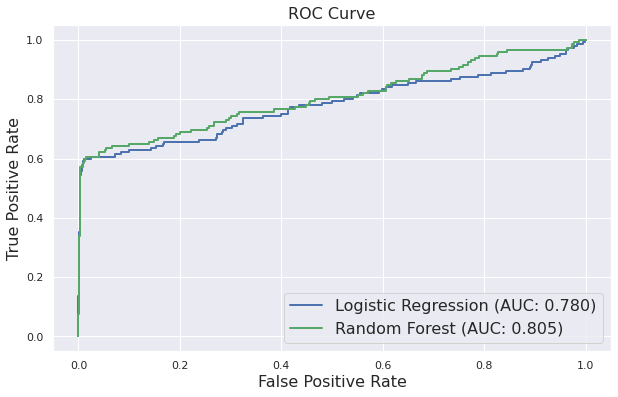

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(fpr_lr,tpr_lr,label="Logistic Regression (AUC: {:.3f})".format(auc_lr),linewidth=2)
plt.plot(fpr_rf,tpr_rf,'g',label="Random Forest (AUC: {:.3f})".format(auc_rf),linewidth=2)
plt.xlabel("False Positive Rate",fontsize=16)
plt.ylabel("True Positive Rate",fontsize=16)
plt.title("ROC Curve",fontsize=16)
plt.legend(loc="lower right",fontsize=16)

## + 10x negative instances

In [ ]:
X_test_dup = np.vstack((X_test,X_test[y_test==0],X_test[y_test==0],X_test[y_test==0],X_test[y_test==0],X_test[y_test==0],X_test[y_test==0],X_test[y_test==0],X_test[y_test==0],X_test[y_test==0]))

In [ ]:
y_test_dup = np.array(y_test.tolist() + y_test[y_test==0].tolist()*9)

In [ ]:
pos_prob_lr_dup = lr.predict_proba(X_test_dup)[:,1]

In [ ]:
pos_prob_rf_dup = rf.predict_proba(X_test_dup)[:,1]

In [ ]:
tpr_lr_dup,fpr_lr_dup,auc_lr_dup = get_roc(pos_prob_lr_dup,y_test_dup)
tpr_rf_dup,fpr_rf_dup,auc_rf_dup = get_roc(pos_prob_rf_dup,y_test_dup)

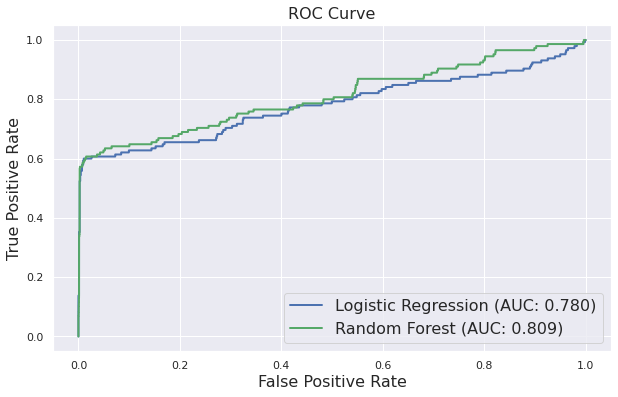

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(fpr_lr_dup,tpr_lr_dup,label="Logistic Regression (AUC: {:.3f})".format(auc_lr_dup),linewidth=2)
plt.plot(fpr_rf_dup,tpr_rf_dup,'g',label="Random Forest (AUC: {:.3f})".format(auc_rf_dup),linewidth=2)
plt.xlabel("False Positive Rate",fontsize=16)
plt.ylabel("True Positive Rate",fontsize=16)
plt.title("ROC Curve",fontsize=16)
plt.legend(loc="lower right",fontsize=16)

In [ ]:
pos_prob_lr_dup[:20]

array([0.15468455, 0.12589295, 0.02398865, 0.00910117, 0.0608363 ,
       0.05102205, 0.09413248, 0.05424556, 0.15544581, 0.05066446,
       0.08803039, 0.00711518, 0.15576543, 0.03810023, 0.14342835,
       0.07646628, 0.02089466, 0.03766667, 0.03491735, 0.04595112])

In [ ]:
pos_prob_rf_dup[:20]

array([0.03, 0.01, 0.08, 0.03, 0.03, 0.12, 0.06, 0.05, 0.04, 0.17, 0.06,
       0.  , 0.  , 0.07, 0.03, 0.  , 0.25, 0.01, 0.03, 0.02])

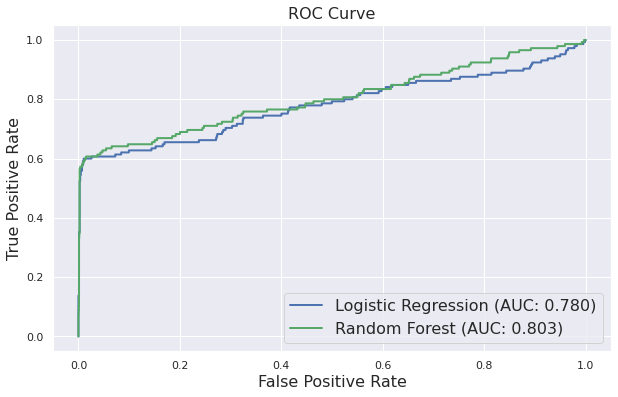

In [ ]:
index = np.random.permutation(len(X_test_dup))
X_test_dup = X_test_dup[index]
y_test_dup = y_test_dup[index]
pos_prob_lr_dup = lr.predict_proba(X_test_dup)[:,1]
pos_prob_rf_dup = rf.predict_proba(X_test_dup)[:,1]
tpr_lr_dup,fpr_lr_dup,auc_lr_dup = get_roc(pos_prob_lr_dup,y_test_dup)
tpr_rf_dup,fpr_rf_dup,auc_rf_dup = get_roc(pos_prob_rf_dup,y_test_dup)

plt.figure(figsize=(10,6))
plt.plot(fpr_lr_dup,tpr_lr_dup,label="Logistic Regression (AUC: {:.3f})".format(auc_lr_dup),linewidth=2)
plt.plot(fpr_rf_dup,tpr_rf_dup,'g',label="Random Forest (AUC: {:.3f})".format(auc_rf_dup),linewidth=2)
plt.xlabel("False Positive Rate",fontsize=16)
plt.ylabel("True Positive Rate",fontsize=16)
plt.title("ROC Curve",fontsize=16)
plt.legend(loc="lower right",fontsize=16)

## Precision Recall Curve

In [ ]:
def get_pr(pos_prob,y_true):
    pos = y_true[y_true==1]
    threshold = np.sort(pos_prob)[::-1]
    y = y_true[pos_prob.argsort()[::-1]]
    recall = [] ; precision = []
    tp = 0 ; fp = 0
    # y_step = 1/float(len(pos))
    auc = 0
    for i in range(len(threshold)):
        if y[i] == 1:
            tp += 1
            recall.append(tp/len(pos))
            precision.append(tp/(tp+fp))
            auc += (recall[i]-recall[i-1])*precision[i]
        else:
            fp += 1
            recall.append(tp/len(pos))
            precision.append(tp/(tp+fp))
    return precision,recall,auc

In [ ]:
precision_lr,recall_lr,auc_lr = get_pr(pos_prob_lr,y_test)
precision_rf,recall_rf,auc_rf = get_pr(pos_prob_rf,y_test)

In [ ]:
auc_lr, auc_rf

(0.6762601840630695, 0.6897412403520687)

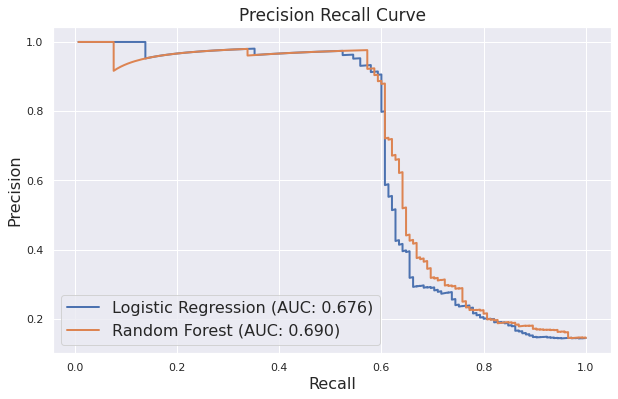

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(recall_lr,precision_lr,label="Logistic Regression (AUC: {:.3f})".format(auc_lr),linewidth=2)
plt.plot(recall_rf,precision_rf,label="Random Forest (AUC: {:.3f})".format(auc_rf),linewidth=2)
plt.xlabel("Recall",fontsize=16)
plt.ylabel("Precision",fontsize=16)
plt.title("Precision Recall Curve",fontsize=17)
plt.legend(fontsize=16)